In [48]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
def extract_latency(file_path, label):
    with open(file_path, "r") as file:
        raw_data = file.read()
    values = [int(match) for match in re.findall(r'# click\s*(\d+)', raw_data)]
    values_in_ms = [value / 1000 for value in values]
    
    return pd.DataFrame({'Latency (ms)': values_in_ms, 'Added Latency Range (in Milliseconds)': label})

# Latenzdaten aus beiden Dateien extrahieren
df_0 = extract_latency("latency_system/latency_0.txt", "0")
df_80 = extract_latency("latency_system/latency_80.txt", "80")


In [50]:
df = pd.concat([df_0, df_80], ignore_index=True)
df

,Latency (ms),Added Latency Range (in Milliseconds)
0,12.216,0
1,13.436,0
2,12.768,0
3,12.212,0
4,12.208,0
...,...,...
138,92.676,80
139,92.424,80
140,93.680,80
141,94.196,80


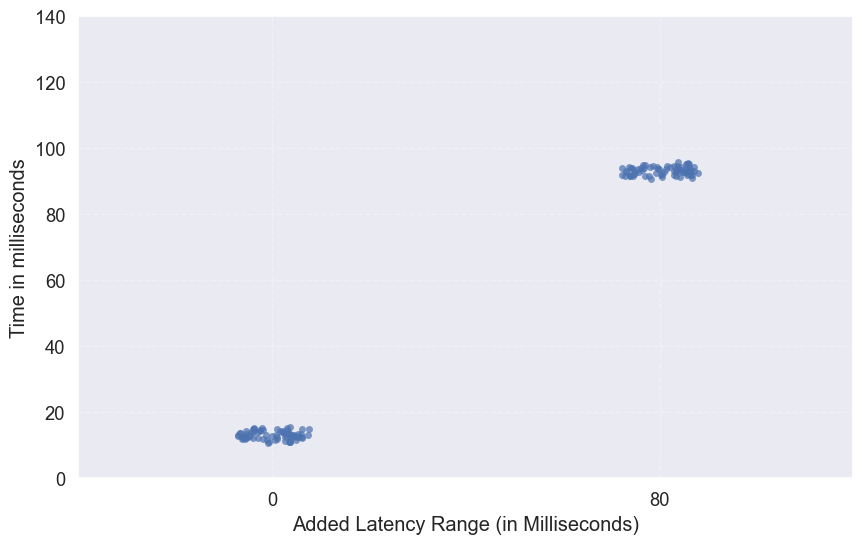

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Stripplot statt Swarmplot
sns.stripplot(x=df['Added Latency Range (in Milliseconds)'], y=df['Latency (ms)'], alpha=0.7, jitter=True)

plt.xlabel("Added Latency Range (in Milliseconds)")
plt.ylabel("Time in milliseconds")
plt.grid(True, linestyle='--', alpha=0.3)

plt.ylim([0, 140])

plt.show()


In [52]:
df_0["Latency (ms)"].mean()

np.float64(13.09857142857143)

In [53]:
df_80["Latency (ms)"].mean()

np.float64(93.18509589041095)

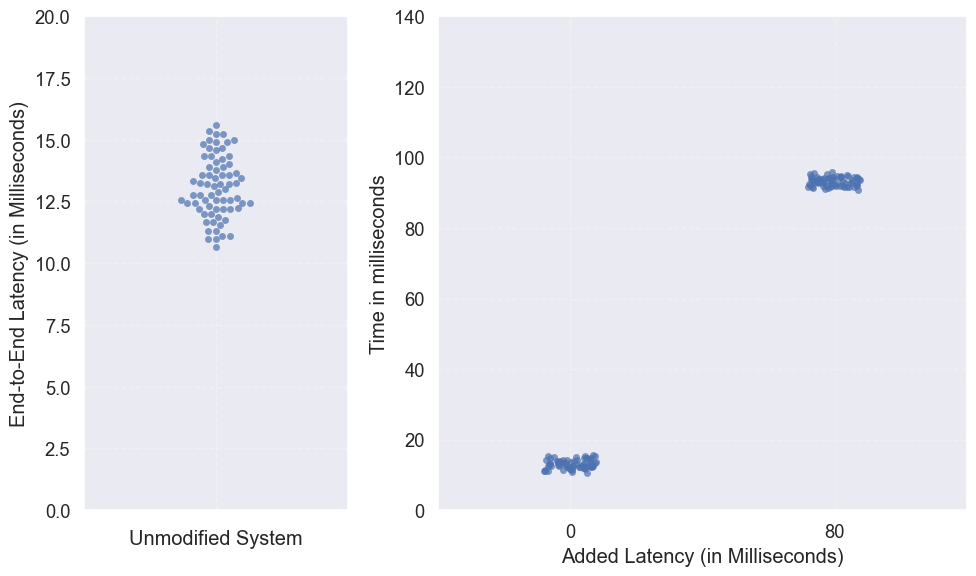

In [54]:
import matplotlib.gridspec as gridspec

# Erstelle das Figure-Objekt
fig = plt.figure(figsize=(10, 6))

# Verwende GridSpec für unterschiedliche Größen
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 6])  # Erstes Diagramm schmaler, zweites breiter

sns.set_style("whitegrid")
sns.set(font_scale = 1.2)

# Zweites Diagramm (Swarmplot)
ax1 = plt.subplot(gs[0])
sns.swarmplot(ax=ax1, x=df_0['Added Latency Range (in Milliseconds)'], y=df_0['Latency (ms)'], alpha=0.7)
ax1.set_xlabel("Unmodified System")
ax1.set_ylabel("End-to-End Latency (in Milliseconds)")
ax1.grid(True, linestyle='--', alpha=0.3)
ax1.set_ylim([0, 20])
ax1.set(xticklabels=[])

# Erstes Diagramm (Stripplot)
ax0 = plt.subplot(gs[1])
sns.stripplot(ax=ax0, x=df['Added Latency Range (in Milliseconds)'], y=df['Latency (ms)'], alpha=0.7, jitter=True)
ax0.set_xlabel("Added Latency (in Milliseconds)")
ax0.set_ylabel("Time in milliseconds")
ax0.grid(True, linestyle='--', alpha=0.3)
ax0.set_ylim([0, 140])



# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()
